### testing the evidence regularizer on simple data

In [3]:
import torch
import matplotlib.pyplot as plt
import torch.distributions as td

In [39]:
# true distribution
# mu = sin(x1), cos(x2)
p = torch.Tensor([[0.1, 0.5], [0.4, 0.4]])
cov = p.T @ p
cov = cov.unsqueeze(0).expand(1000, 2, 2)

In [109]:
x = torch.randn((1000,2)) * torch.Tensor([10,1])
y0 = torch.cos(x[:,0])
y1 = torch.sin(x[:,1]*2)
mu = torch.zeros(x.shape)
mu[:,0] = y0
mu[:,1] = y1
dist = td.MultivariateNormal(mu, covariance_matrix=cov)
samples = dist.sample()


v = torch.nn.functional.softmax(samples, dim=1)
label = v.argmax(dim=1)

In [110]:
samples

tensor([[ 1.2539,  1.9828],
        [-1.7080, -1.6237],
        [ 0.7676,  0.0330],
        ...,
        [-0.9315,  0.4748],
        [-0.5966,  0.8110],
        [ 0.7587,  1.4879]])

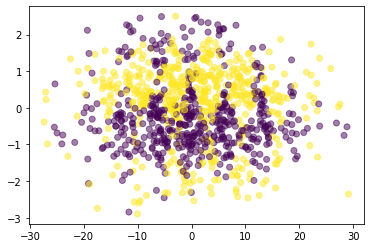

In [111]:
plt.scatter(x[:,0], x[:,1], c=label, alpha=0.5)

In [24]:
samples = dist.sample((1000,))
labels = (0.25 < samples[:,0]) * (0.75 > samples[:,0]) * (-1.25 < samples[:,1]) * (-0.75 > samples[:,1])

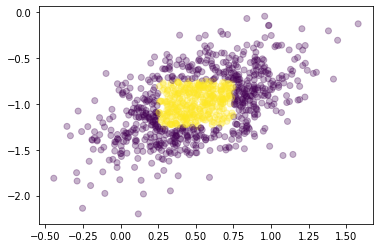

In [25]:
plt.scatter(samples[:,0], samples[:,1], c=labels, alpha=0.3)